Importing Important Libraries

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
drive.mount('/content/drive')

Mounted at /content/drive


Import Dataset

In [ ]:
file = '/content/drive/My Drive/BD_Project/supermarket_sales.csv'
df = pd.read_csv(file)

Explore the Dataset

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,750-67-8428,A,San Diego,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-19,13:08,Ewallet,522.83,26.1415,9.1
1,226-31-3081,C,Chicago,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-19,10:29,Cash,76.40,3.8200,9.6
2,631-41-3108,A,San Diego,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,13:23,Credit card,324.31,16.2155,7.4
3,123-19-1176,A,San Diego,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,373-73-7910,A,San Diego,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-19,10:37,Ewallet,604.17,30.2085,5.3


In [ ]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
995,233-67-5758,C,Chicago,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,2.0175,6.2
996,303-96-2227,B,Austin,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-19,17:16,Ewallet,973.80,48.6900,4.4
997,727-02-1313,A,San Diego,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-19,13:22,Cash,31.84,1.5920,7.7
998,347-56-2442,A,San Diego,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,3.2910,4.1
999,849-09-3807,A,San Diego,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,30.9190,6.6


In [ ]:
df.shape

(1000, 16)

In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross income', 'Rating'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  cogs           1000 non-null   float64
 14  gross income   1000 non-null   float64
 15  Rating         1000 non-null   float64
dtypes: float64(6), int64(1), object(9)
memory usage: 125.1+ KB


In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000


Data Cleaning

In [ ]:
df.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
cogs             0
gross income     0
Rating           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

There is Nothing to clean, lets move on to the next step that is Exploratory Data Analysis (EDA).

Exploratory Data Analysis (EDA)

In this step I would like to explore these questions to analyze the trends in Supermarket sales.

1. What is the average total amount spent by each customer type and gender?
2. What is the total sales for each gender and product line combination?
3. What are the most popular payment methods used in the supermarket?
4. Which cities are the biggest contributors to the overall sales?
5. What are the most profitable product lines in the supermarket?

1. What is the average total amount spent by each customer type and gender?

Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64


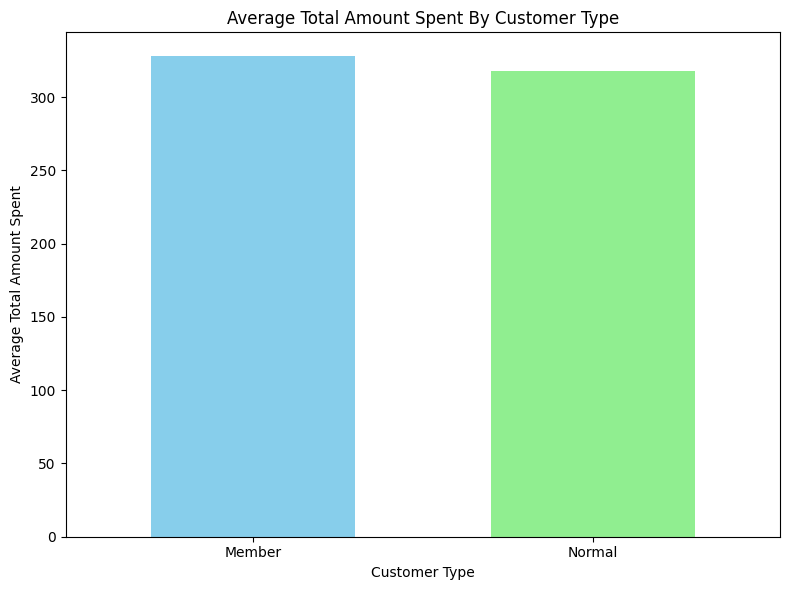

In [ ]:
# group the data by customer type and calculate the average total amount spent by each type

df_customer_type = df.groupby('Customer type')['Total'].mean()
print(df_customer_type)

# Importing the required libraries
import matplotlib.pyplot as plt

# Adjusting the size of the plot
plt.figure(figsize=(8, 6))

# Plotting the bar chart
df_customer_type.plot(kind='bar', color=['skyblue', 'lightgreen'], width=0.6)

# Adding title and labels
plt.title('Average Total Amount Spent By Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Total Amount Spent')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=0)

# Displaying the plot
plt.tight_layout()
plt.show()

Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64


<ipython-input-12-f8f22c95f848>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Total', data=df, palette={'Female': 'lightblue', 'Male': 'lightcoral'})


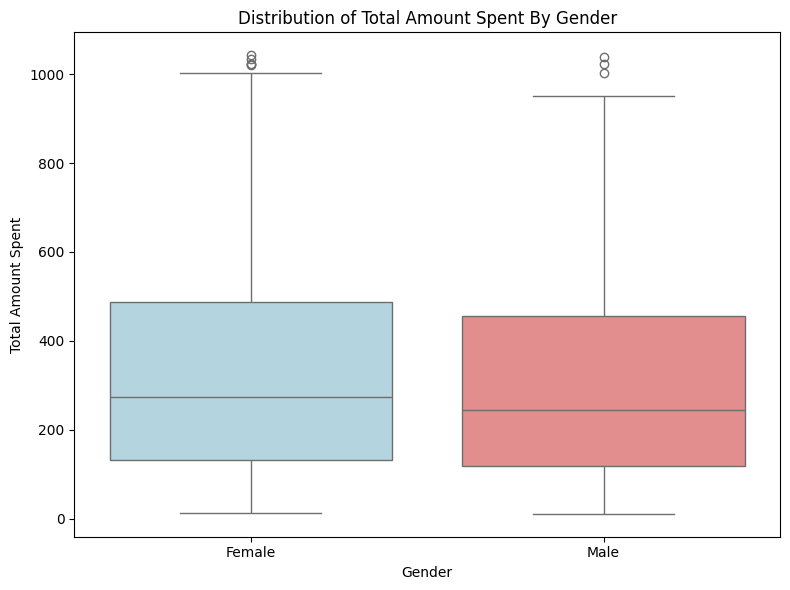

In [ ]:
# group the data by gender and calculate the average total amount spent by each gender

df_genderr = df.groupby('Gender')['Total'].mean()
print(df_genderr)

# Importing the required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusting the size of the plot
plt.figure(figsize=(8, 6))

# Plotting the box plot
sns.boxplot(x='Gender', y='Total', data=df, palette={'Female': 'lightblue', 'Male': 'lightcoral'})

# Adding title and labels
plt.title('Distribution of Total Amount Spent By Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount Spent')

# Displaying the plot
plt.tight_layout()
plt.show()


2. What is the total sales for each gender and product line combination?

Gender  Product line          
Female  Electronic accessories    27102.0225
        Fashion accessories       30437.4000
        Food and beverages        33170.9175
        Health and beauty         18560.9865
        Home and lifestyle        30036.8775
        Sports and travel         28574.7210
Male    Electronic accessories    27235.5090
        Fashion accessories       23868.4950
        Food and beverages        22973.9265
        Health and beauty         30632.7525
        Home and lifestyle        23825.0355
        Sports and travel         26548.1055
Name: Total, dtype: float64


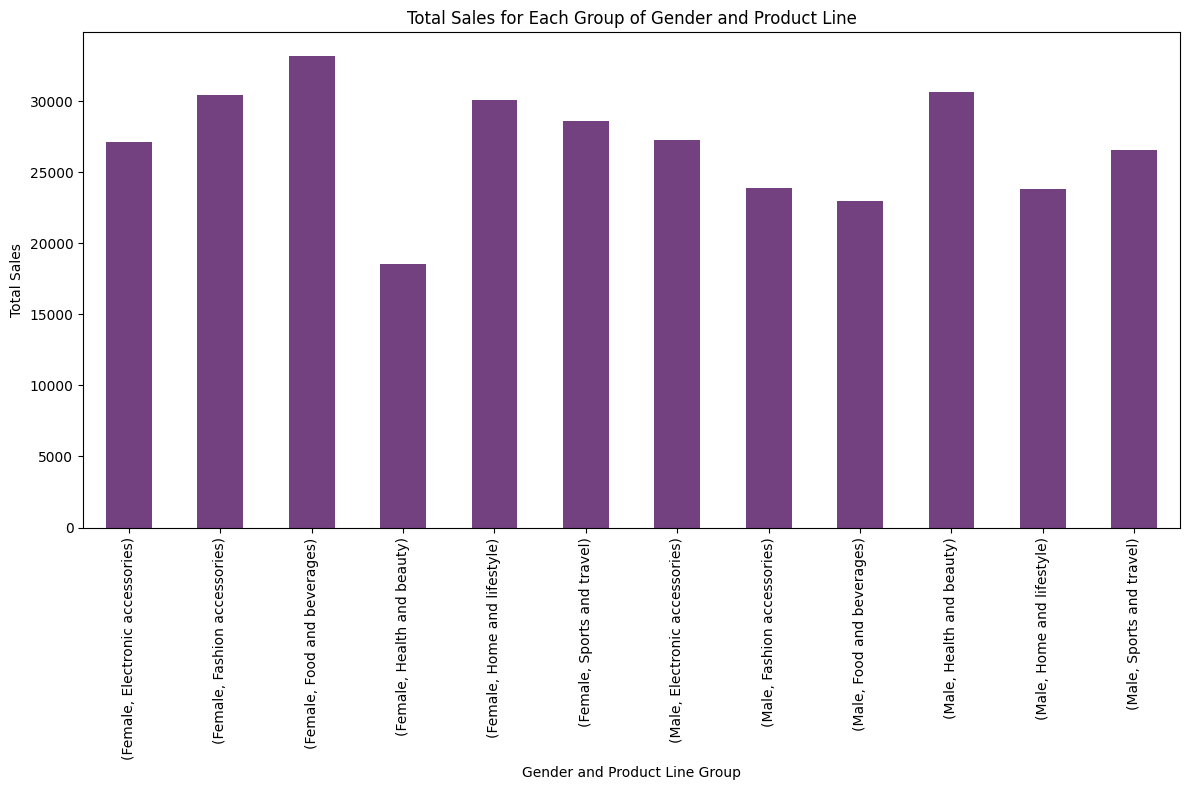

In [ ]:
# group the data by gender and product line and calculate the total sales for each group

df_gender_product_line = df.groupby(['Gender', 'Product line'])['Total'].sum()
print(df_gender_product_line)

# Importing the required libraries
import matplotlib.pyplot as plt

# Adjusting the size of the plot
plt.figure(figsize=(12, 8))

# Plotting the bar chart
df_gender_product_line.plot(kind='bar', colormap='viridis', alpha=0.75)

# Adding title and labels
plt.title('Total Sales for Each Group of Gender and Product Line')
plt.xlabel('Gender and Product Line Group')
plt.ylabel('Total Sales')



# Displaying the plot
plt.tight_layout()
plt.show()


<ipython-input-14-561f2371e47c>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product line', y='Total', hue='Gender', data=df, estimator=sum, ci=None, palette='pastel')


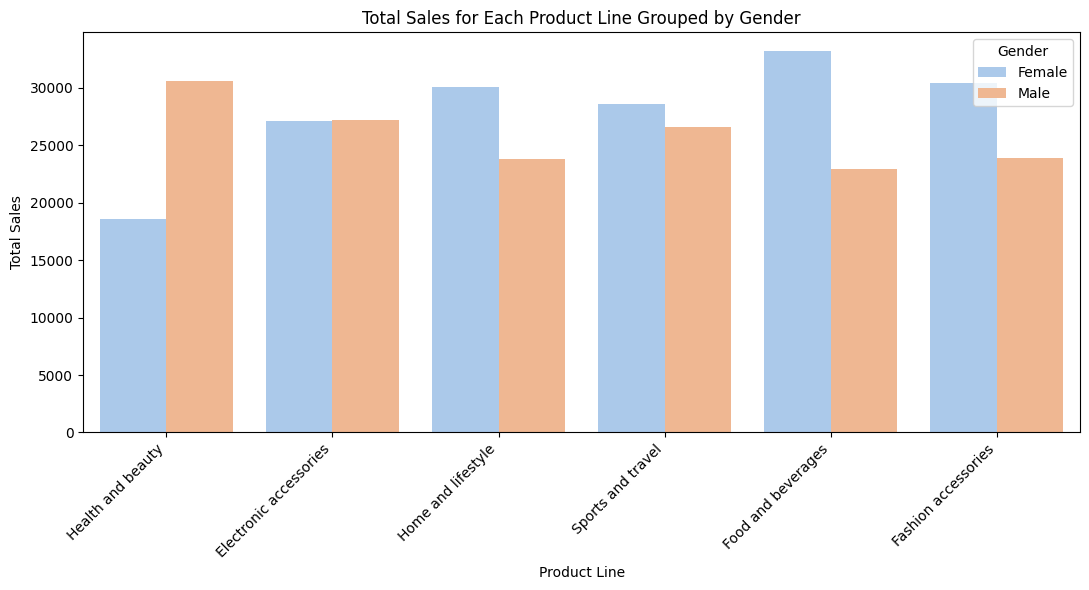

In [ ]:
# Importing the required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusting the size of the plot
plt.figure(figsize=(11, 6))

# Plotting the bar plot
sns.barplot(x='Product line', y='Total', hue='Gender', data=df, estimator=sum, ci=None, palette='pastel')

# Adding title and labels
plt.title('Total Sales for Each Product Line Grouped by Gender')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.tight_layout()
plt.show()


3. What are the most popular payment methods used in the supermarket?

Most popular payment methods:
Payment
Cash           112206.570
Ewallet        109993.107
Credit card    100767.072
Name: Total, dtype: float64


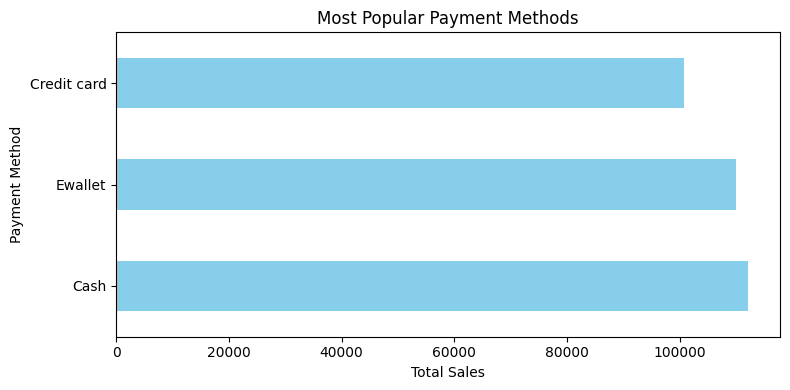

In [ ]:
# group the data by payment method and calculate the total sales for each payment method
payment_method_sales = df.groupby('Payment')['Total'].sum()

# sort the payment methods by total sales in descending order
payment_method_sales = payment_method_sales.sort_values(ascending=False)

# print the most popular payment methods
print('Most popular payment methods:')
print(payment_method_sales.head(10))

# Importing the required libraries
import matplotlib.pyplot as plt

# Adjusting the size of the plot
plt.figure(figsize=(8, 4))

# Plotting the horizontal bar chart
payment_method_sales.head(10).plot(kind='barh', color='skyblue')

# Adding title and labels
plt.title('Most Popular Payment Methods')
plt.xlabel('Total Sales')
plt.ylabel('Payment Method')

# Displaying the plot
plt.tight_layout()
plt.show()



4. Which cities are the biggest contributors to the overall sales?

In [ ]:
# Importing the required libraries
import pandas as pd

# Calculating the total sales for each city
df_city_sales = df.groupby('City')['Total'].sum()

# Printing the total sales for each city
print("Total Sales by City:")
print(df_city_sales)


Total Sales by City:
City
Austin       106197.6720
Chicago      110568.7065
San Diego    106200.3705
Name: Total, dtype: float64


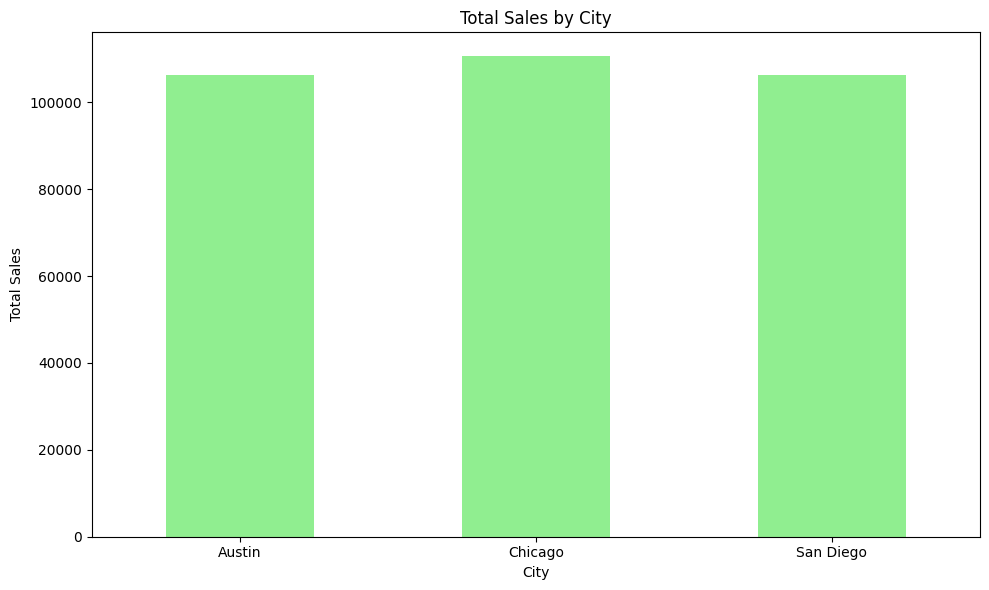

In [ ]:
# Importing the required library
import matplotlib.pyplot as plt

# Adjusting the size of the plot
plt.figure(figsize=(10, 6))

# Plotting the bar chart with a different color (e.g., green)
df_city_sales.plot(kind='bar', color='lightgreen')

# Adding title and labels
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=0)

# Displaying the plot
plt.tight_layout()
plt.show()

5. What are the most profitable product lines in the supermarket?

Most popular product lines:
Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64


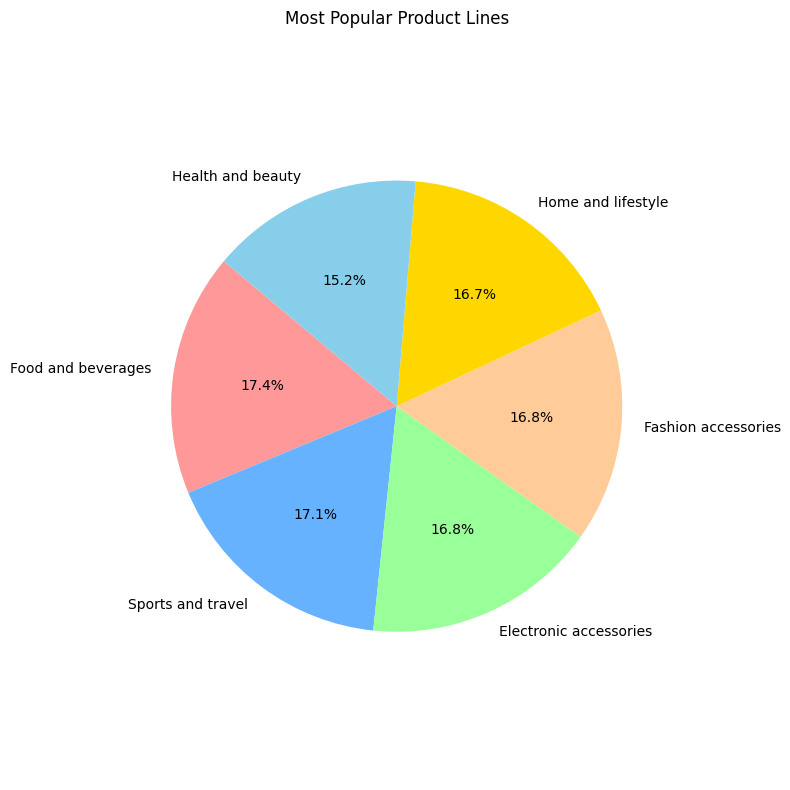

In [ ]:
# group the data by product line and calculate the total sales for each product line
product_line_sales = df.groupby('Product line')['Total'].sum()

# sort the product lines by total sales in descending order
product_line_sales = product_line_sales.sort_values(ascending=False)

# print the most popular product lines
print('Most popular product lines:')
print(product_line_sales.head(10))

# Importing the required library
import matplotlib.pyplot as plt

# Defining a light color palette
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#87CEEB', '#FFB6C1', '#98FB98', '#FF6347', '#C0C0C0']

# Adjusting the size of the plot
plt.figure(figsize=(8, 8))

# Plotting the pie chart with the light color palette
plt.pie(product_line_sales.head(10), labels=product_line_sales.head(10).index, autopct='%3.1f%%', startangle=140, colors=colors)

# Adding title
plt.title('Most Popular Product Lines')

# Displaying the plot
plt.axis('equal')
plt.tight_layout()
plt.show()

Coorelation Matrix

<ipython-input-19-e158fed7ea5c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


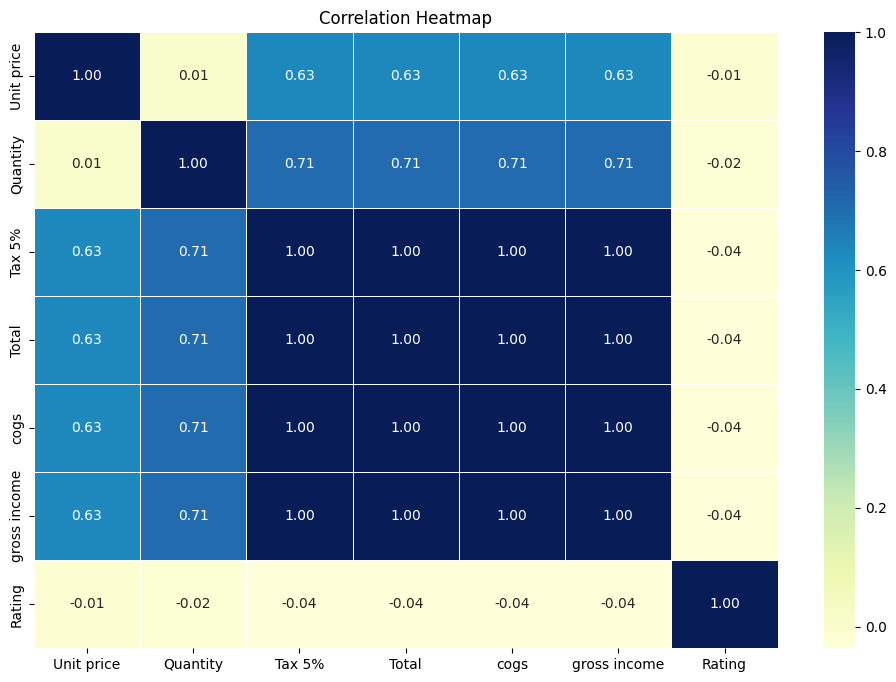

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

Model Building

Removing Unwanted features

In [ ]:
# Dropping unnecessary columns
df.drop(['Invoice ID'], axis=1, inplace=True)

Linear Regression

In [ ]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Splitting the dataset into features (X) and target variable (y)
X = df.drop('Total', axis=1)
y = df['Total']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initializing and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 4.829787290428326e-12
Mean Absolute Error (MAE): 4.74627565587582e-07
R-squared (R2): 0.9999999999999999


Graph for this model

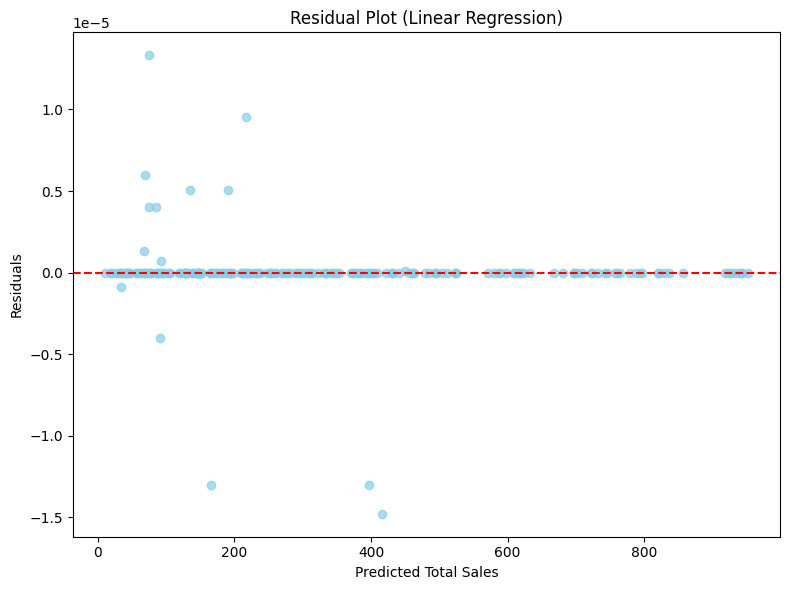

In [ ]:
# Calculating residuals
residuals = y_test - y_pred

# Creating residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='skyblue', alpha=0.7)

# Adding a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')

# Adding labels and title
plt.title('Residual Plot (Linear Regression)')
plt.xlabel('Predicted Total Sales')
plt.ylabel('Residuals')

# Displaying the plot
plt.tight_layout()
plt.show()

Decision Tree Model

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset into features (X) and target variable (y)
X = df.drop('Total', axis=1)
y = df['Total']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 2: Train a Decision Tree model (you can customize hyperparameters as needed)
dct_model = DecisionTreeRegressor(random_state=42)
dct_model.fit(X_train, y_train)

# Make predictions
y_predDT = dct_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_predDT)
mae = mean_absolute_error(y_test, y_predDT)
r2 = r2_score(y_test, y_predDT)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 4.529508795000023
Mean Absolute Error (MAE): 1.2979050000000023
R-squared (R2): 0.9999303784510423


Graph for the above model

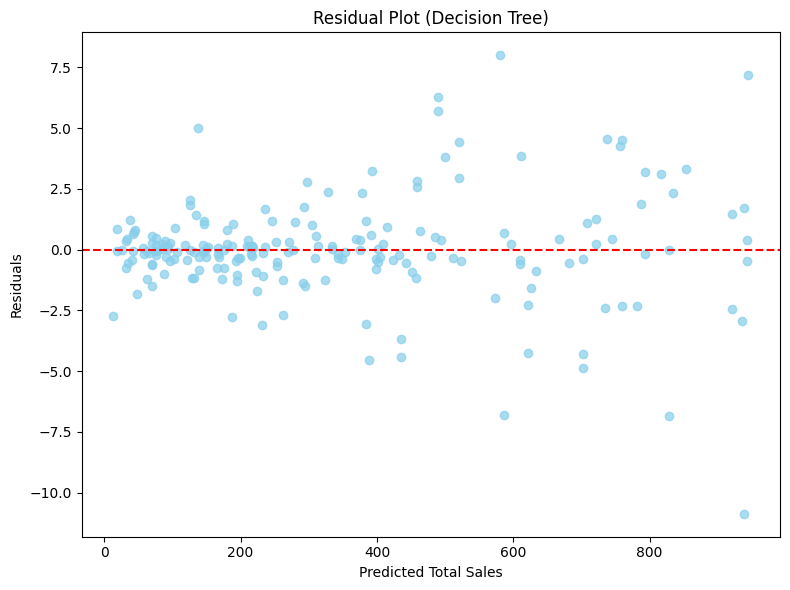

In [ ]:
# Calculating residuals
residuals = y_test - y_predDT

# Creating residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_predDT, residuals, color='skyblue', alpha=0.7)

# Adding a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')

# Adding labels and title
plt.title('Residual Plot (Decision Tree)')
plt.xlabel('Predicted Total Sales')
plt.ylabel('Residuals')

# Displaying the plot
plt.tight_layout()
plt.show()

Random Forest Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Splitting the dataset into features (X) and target variable (y)
X = df.drop('Total', axis=1)
y = df['Total']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a Linear Regression model (you can use other regression models as well)
ran_model = RandomForestRegressor(n_estimators=100, random_state=42)
ran_model.fit(X_train, y_train)

# Make predictions
y_predRF = ran_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_predRF)
mae = mean_absolute_error(y_test, y_predRF)
r2 = r2_score(y_test, y_predRF)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 1.5894383487963772
Mean Absolute Error (MAE): 0.7443717750000027
R-squared (R2): 0.9999755692802853


Graph for the above model

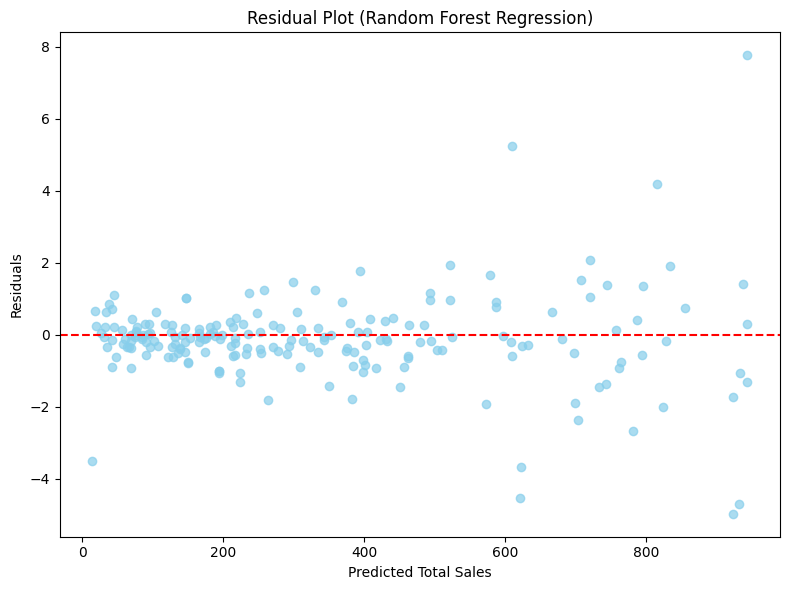

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_predRF

# Create predicted vs. residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_predRF, residuals, color='skyblue', alpha=0.7)

# Add horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')

# Add labels and title
plt.title('Residual Plot (Random Forest Regression)')
plt.xlabel('Predicted Total Sales')
plt.ylabel('Residuals')

# Display the plot
plt.tight_layout()
plt.show()